<a href="https://colab.research.google.com/github/cnix17/STAT-7220-Applied-Experimental-Design/blob/main/Assignments/Final-Exam/Final-Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STAT 7220 - Final Exam
## Factorial Designs
## Dr. Austin Brown
## Due Date: December 12, 2025

## Part 1 Instructions:
Let's say you own a new food truck called **Buster's Breakfast Burritos**. To determine the best ingredients for your burritos, and as a means of minimizing food (and money) waste, you decide to conduct an experiment. Specifically, you want to investigate the following treatments:

| Factor   | Levels                  |
|:---------|:------------------------|
| Protein  | Bacon, Sausage, Chorizo |
| Salsa    | Mild, Hot               |
| Potatoes | Yes, No                 |

To gather data for this experiment, you recruit $r=5$ local residents for each of the $3\times 2\times 2=12$ treatment combinations. After each participant has tasted their randomly assigned burrito, you ask them to rate the burrito on a scale of 1 to 10 (1 = terrible, 10 = amazing). The data are stored in the file `Busters Burritos.xlsx` in the assignment repo. With these data, I want you to:

1. Briefly state the objective of the experiment.

2. State the outcome variable and how it was measured.

3. State the main effects. What lurking variables may be present?

4. Why might a full factorial design be preferred here to a $2^k$ fractional factorial design?

5. State all sets of statistical hypotheses.

6. Perform appropriate exploratory/descriptive analysis including summary statistics and appropriate visualizations. Do these analyses provide any support for the hypotheses? Briefly explain.


In [1]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "cnix17"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
   print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
   if os.path.exists(repo_name):
       print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
   else:
       print(f"📥 Cloning repo from {repo_url}...")
       os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
   if os.path.exists(repo_name):
       os.chdir(repo_name)
       print(f"📂 Changed directory to: {os.getcwd()}")
   else:
       print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/Final-Exam"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")



📥 Cloning repo from https://github.com/cnix17/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/cnix17/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/Final-Exam


In [ ]:
# Question 1 Answer: The objective is to determine how protein type (bacon, sausage, chorizo), salsa heat (mild vs hot), and the presence of potatoes (yes vs no) — and their interactions affect customers’ satisfaction ratings for breakfast burritos.

# Question 2 Answer: The outcome variable is Customer Satisfaction on a numeric 1-10 scale basis based on the burrito served to them.

# Question 3 Answer: Main effects include: Protein : Bacon, Sausage, Chorizo ; Salsa: Mild, Hot - Potatoes: Yes, No | Possible lurking variables include: Time of day, the order in which the burritos are served, hunger-amount/how hungry one might be, differences in prep size, and individual taste preferences.

# Question 4 Answer: Not all factors are 2-level (protein has three) - Therefore, a 2^k fractional factorial design naturally does not fit. Full factorial gives unaliased estimates of all main effects and interactions and is easier to interpret.

# Question 5 Answer: For Protein:
                                  #H0: μBacon = μSausage = μChrorizo
                                  #HA: At least one protein mean differs.

                    #For Salsa:
                                 #H0: μMild = μHot
                                 #HA: μMild =/= μHot
                   #For Potatoes:
                                 #H0: μPotatoes Yes = μPotatoes No
                                 #HA: μPotatoes Yes =/= μPotatoes No

                  # For each interation:
                    # Protein x Salsa:
                                 #H0: The effect of salsa does not depend on protein (no Protein x Salsa interaction)
                                 #HA: There is a Protein x Salsa interaction
                  # Protein x Potatoes, Salsa x Potatoes, Protein x Salsa x Potatoes
                                # H0: No interation
                                #HA: Interation is present

=== Cell means by Protein x Salsa x Potatoes ===
                        mean       std  count
Protein Salsa Potatoes                       
Bacon   Hot   No        5.86  1.335290      5
              Yes       6.46  0.397492      5
        Mild  No        6.70  0.418330      5
              Yes       6.94  1.510960      5
Chorizo Hot   No        6.34  0.610737      5
              Yes       6.82  2.104044      5
        Mild  No        7.04  0.507937      5
              Yes       6.76  0.658027      5
Sausage Hot   No        4.98  1.211198      5
              Yes       5.98  0.641872      5
        Mild  No        5.74  0.952890      5
              Yes       6.58  0.944458      5

=== Main-effect means ===

Protein means:
Protein
Bacon      6.49
Chorizo    6.74
Sausage    5.82
Name: Satisfaction, dtype: float64

Salsa means:
Salsa
Hot     6.073333
Mild    6.626667
Name: Satisfaction, dtype: float64

Potatoes means:
Potatoes
No     6.11
Yes    6.59
Name: Satisfaction, dtype: float64

/tmp/ipython-input-2826499774.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  desc = burritos.groupby(["Protein", "Salsa", "Potatoes"])["Satisfaction"].agg(["mean", "std", "count"])
/tmp/ipython-input-2826499774.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(burritos.groupby("Protein")["Satisfaction"].mean())
/tmp/ipython-input-2826499774.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(burrito

<Figure size 640x480 with 0 Axes>

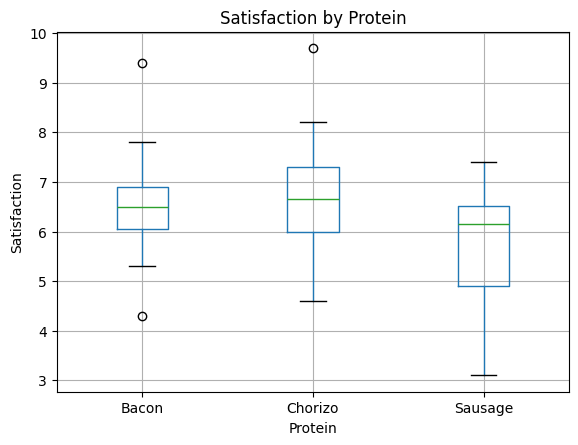

<Figure size 640x480 with 0 Axes>

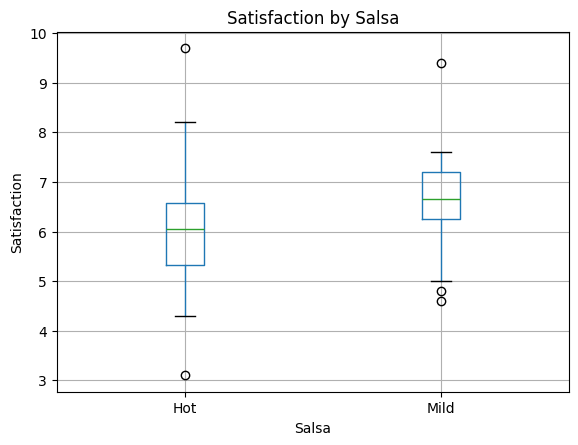

<Figure size 640x480 with 0 Axes>

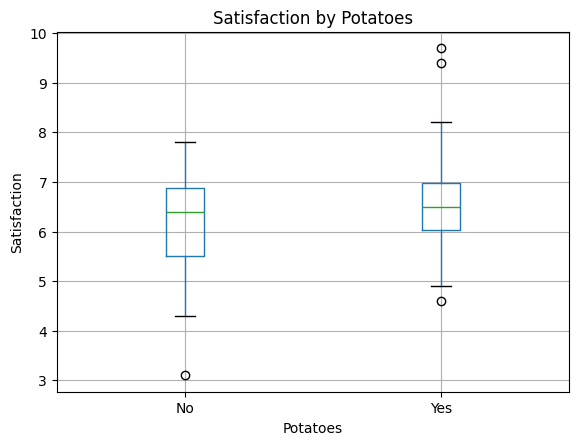

<Figure size 640x480 with 0 Axes>

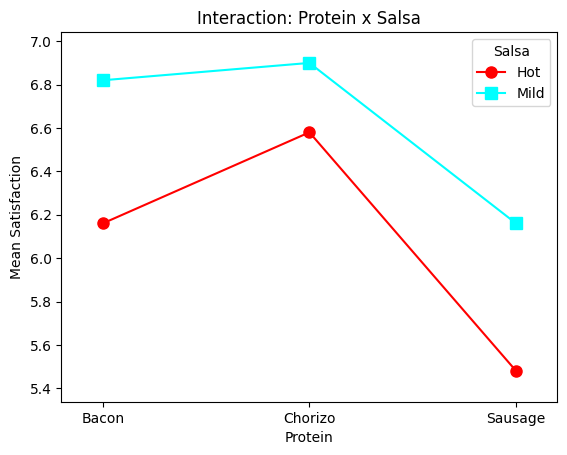

In [3]:
## Question 6 Code ##

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Read data
burritos = pd.read_excel("Busters Burritos.xlsx")

# Treat factors as categorical
for col in ["Protein", "Salsa", "Potatoes"]:
    burritos[col] = burritos[col].astype("category")

# Descriptive statistics by full treatment combination
desc = burritos.groupby(["Protein", "Salsa", "Potatoes"])["Satisfaction"].agg(["mean", "std", "count"])
print("=== Cell means by Protein x Salsa x Potatoes ===")
print(desc)

# Main-effect means
print("\n=== Main-effect means ===")

print("\nProtein means:")
print(burritos.groupby("Protein")["Satisfaction"].mean())

print("\nSalsa means:")
print(burritos.groupby("Salsa")["Satisfaction"].mean())

print("\nPotatoes means:")
print(burritos.groupby("Potatoes")["Satisfaction"].mean())

# Boxplot by Protein
plt.figure()
burritos.boxplot(column="Satisfaction", by="Protein")
plt.title("Satisfaction by Protein")
plt.suptitle("")
plt.xlabel("Protein")
plt.ylabel("Satisfaction")
plt.show()

# Boxplot by Salsa
plt.figure()
burritos.boxplot(column="Satisfaction", by="Salsa")
plt.title("Satisfaction by Salsa")
plt.suptitle("")
plt.xlabel("Salsa")
plt.ylabel("Satisfaction")
plt.show()

# Boxplot by Potatoes
plt.figure()
burritos.boxplot(column="Satisfaction", by="Potatoes")
plt.title("Satisfaction by Potatoes")
plt.suptitle("")
plt.xlabel("Potatoes")
plt.ylabel("Satisfaction")
plt.show()

# Interaction plot: Protein x Salsa
plt.figure()
interaction_plot(
    burritos["Protein"].astype(str),   # cast to string for interaction_plot
    burritos["Salsa"].astype(str),
    burritos["Satisfaction"],
    markers=["o", "s"],
    ms=8
)
plt.ylabel("Mean Satisfaction")
plt.title("Interaction: Protein x Salsa")
plt.show()



In [ ]:
# Question 6 Interpretation

# My descriptive statistics and boxplots provide evidence that the meain factors influence customer satisfaction.
#Protein: Chorizo and bacon generally produce higher satisfaction scores than sausage. The boxplots shot higher medians and tighter distributions for chorizo and bacon while sauasage includes several low ratings (~3-5), pulling its mean to 5.82. Compared to bacon (6.49) and chorizo (6.74), this suggests protein is likely an important factor.
#Salsa: Mild salsa consistentcy yields higher satisfaction (6.63) than hot (6.07). Using the boxplot, mild is shifted upward, with a higher median and upper quartile -> indicating that customers tend to prefer milder heat levels.
#Potatoes: Including potatoes produces slightly high average satisfaction (6.59 vs 6.11). The direction is consistent across conditions, suggesting potatoes may have a small positive effect.
#Interaction (Protein x Salsa): the interation plot shows roughly parallel lines for hot and mild salsa across the proteins. The spacing between lines stays relatively similar, even though mild is consistently higher than hot. This indicates no strong evidence of interaction. In other words, the effect of salsa does not meaninfully depend on which protein used.
#Conclusion: The exploratory analysis suggests that pretein and salsa heat level have the strongest influence on satisfaction, with potatoes contributing a smaller positive effect. There is also little visual evidence of interations.

7. Fit the full factorial ANOVA model. Check the assumption of normality using a testing method and a visual method. Does the assumption hold? Why or why not?

=== Full Factorial ANOVA Model Summary ===
                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1.619
Date:                Thu, 04 Dec 2025   Prob (F-statistic):              0.124
Time:                        22:10:30   Log-Likelihood:                -82.128
No. Observations:                  60   AIC:                             188.3
Df Residuals:                      48   BIC:                             213.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<Figure size 640x480 with 0 Axes>

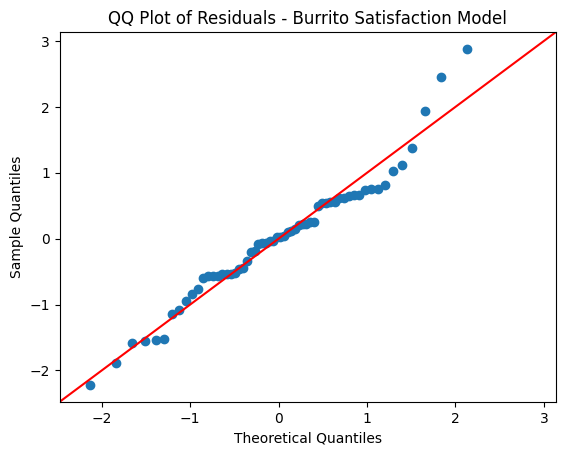


=== Shapiro-Wilk Normality Test ===
W = 0.969, p-value = 0.135


In [4]:
## Question 7 Code ##

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt

# Fit full factorial ANOVA model
model1 = smf.ols("Satisfaction ~ C(Protein)*C(Salsa)*C(Potatoes)", data=burritos).fit()

print("=== Full Factorial ANOVA Model Summary ===")
print(model1.summary())

# ---- Normality Check ----

# 1. Visual: QQ Plot
plt.figure()
sm.qqplot(model1.resid, line="45")
plt.title("QQ Plot of Residuals - Burrito Satisfaction Model")
plt.show()

# 2. Formal Test: Shapiro-Wilk test
shapiro_W, shapiro_p = stats.shapiro(model1.resid)
print("\n=== Shapiro-Wilk Normality Test ===")
print(f"W = {shapiro_W:.3f}, p-value = {shapiro_p:.3f}")



In [ ]:
# Question 7 Interpretation

# The Shapiro - Wilk test returned: W = 0.969 | p = 0.135
# Due to p being greater than 0.05, we fail to reject the null hypothesis that the residuals are normally distributed. This indicates evidence of non-normality.

#Q-Q Plot: The visual shows the residual points lying very close to the 45 degrees line, with only mild tail deviations. There is no major curvature, skew, or systematic pattern.

#Conclusion: Both the QQ plot and Shapiro-Wilk test suggest that the normality assumption is reasonably satisfied for this ANOVA model. Therefore, the results of the factorial ANOVA can be considered valid with respect to normality assumption.

8. Check the assumption of constant variance using a testing method and a visual method. Does the assumption hold? Why or why not?

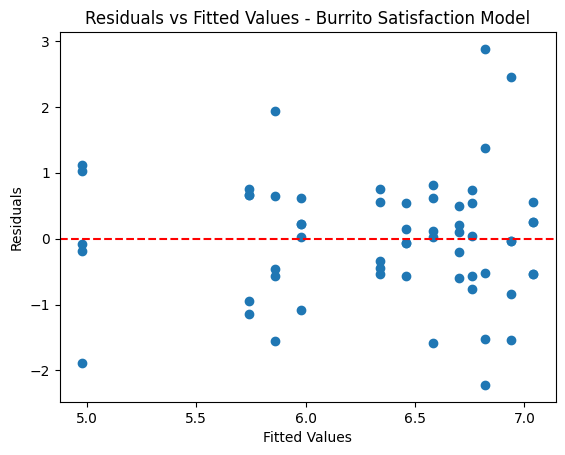

=== Levene’s Test for Homogeneity of Variance ===
Statistic = 1.341, p-value = 0.232


/tmp/ipython-input-1135343541.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, g in burritos.groupby(["Protein", "Salsa", "Potatoes"])


In [5]:
## Question 8 Code ##


from scipy import stats
import matplotlib.pyplot as plt

# Residuals and fitted values
fitted1 = model1.fittedvalues
resid1 = model1.resid

# 1. Visual check: Residuals vs Fitted plot
plt.figure()
plt.scatter(fitted1, resid1)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values - Burrito Satisfaction Model")
plt.show()

# 2. Formal test: Levene’s test across all 12 treatment combinations
groups = [
    g["Satisfaction"].values
    for _, g in burritos.groupby(["Protein", "Salsa", "Potatoes"])
]

lev_stat, lev_p = stats.levene(*groups)
print("=== Levene’s Test for Homogeneity of Variance ===")
print(f"Statistic = {lev_stat:.3f}, p-value = {lev_p:.3f}")



In [ ]:
# Question 8 Interpretation:

#Visual Method: Residuals vs Fitted : The plot shows points scattered randomly around zero with no funnel shape, curvature, or systematic change in spread across the range of fitted values.
#Formal Method: Levene's Test:
  # Levene's test across the 12 treatment combinations produced:
    # Statistic = 1.241 | p-value = 0.232
      # Since the p value is greater than 0.05, we fail to reject the null hypothesis of equal variances among the groups. This indicates no significant evidence of differing variances across treatments.

  #Conclusion: Both the visual and Levene's test support the conclusion that the constant variance assumption is reasonably satisfied for this factorial ANOVA model. The equal-variance assumption underlying ANOVA appears to also hold.

9. Report the ANOVA table. What statistical conclusions can we draw about our main effects and interaction effects?

In [6]:
## Question 9 Code ##


from statsmodels.stats.anova import anova_lm

anova1 = anova_lm(model1, typ=2)
print("=== ANOVA Table (Type II) ===")
print(anova1)



=== ANOVA Table (Type II) ===
                                    sum_sq    df         F    PR(>F)
C(Protein)                        9.052000   2.0  4.002653  0.024677
C(Salsa)                          4.592667   1.0  4.061611  0.049487
C(Potatoes)                       3.456000   1.0  3.056379  0.086815
C(Protein):C(Salsa)               0.409333   2.0  0.181001  0.835002
C(Protein):C(Potatoes)            1.708000   2.0  0.755251  0.475394
C(Salsa):C(Potatoes)              0.682667   1.0  0.603729  0.440971
C(Protein):C(Salsa):C(Potatoes)   0.233333   2.0  0.103176  0.902167
Residual                         54.276000  48.0       NaN       NaN


In [ ]:
# Question 9 Interpretation:

#Main Effects:
  #Protein (p=0.0247) | Protein has a significant effect on satisfaction at a  = 0.05. This indicates that the type of protein influences ratings.
  #Salsa (p=0.0495) | Salsa is also significant at a = 0.05 | Consistent with my exploratory analysis, satisfaction tends to be higher with mild salsa.
  #Potatoes (p=0.0868) | Potatoes is not significant at a=0.05 even though the p-value is borderline & suggests a possible small effect.

#Interaction Effects:
#All interaction terms have large p-values (>=0.44):
#Protein x Salsa : p=0.8350
#Protein x Potatoes: p=0.4754
#Salsa x Protein: p=0.4410
#Three-way interaction: p=0.9022
#None of the interactions are statistically significant, indicating that the factors operate independently & the effect of one factor does not meaningfully depend on the levels of the others


#Conclusion:
# The analysis shows :
  # Protein and Salsa have statistically significant effects on satisfaction.
  # Potatoes is not significant at a=0.05, but it may have a small practical influence.
  # There is no evidence of significant interactions
# Thus, customer satisfaction is primarily driven by protein type and salsa heat level, acting independently of each other.

10. If the interactions and/or main effects were found to be statistically meaningful, conduct appropriate post-hoc tests. Report the results of these tests and any conclusions you can draw from them. If the interactions and/or main effects were not found to be statistically meaningful, explain why post-hoc tests would not be appropriate.

In [7]:
## Question 10 Code ##
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Post-hoc tests for Protein (3 levels, significant main effect)
tukey_protein = pairwise_tukeyhsd(
    endog=burritos["Satisfaction"],
    groups=burritos["Protein"],
    alpha=0.05
)
print("=== Tukey HSD for Protein ===")
print(tukey_protein)

# Post-hoc for Salsa
tukey_salsa = pairwise_tukeyhsd(
    endog=burritos["Satisfaction"],
    groups=burritos["Salsa"],
    alpha=0.05
)
print("\n=== Tukey HSD for Salsa ===")
print(tukey_salsa)




=== Tukey HSD for Protein ===
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
  Bacon Chorizo     0.25 0.7419 -0.5649  1.0649  False
  Bacon Sausage    -0.67 0.1268 -1.4849  0.1449  False
Chorizo Sausage    -0.92 0.0233 -1.7349 -0.1051   True
------------------------------------------------------

=== Tukey HSD for Salsa ===
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   Hot   Mild   0.5533 0.0556 -0.0137 1.1204  False
---------------------------------------------------


In [ ]:
# Question 10 Interpretation

#Protein: Only Chorizo vs Sauasage shows a statistically significant differenc after adjusting for multiple comparisons (p=0.0233). Chorizo burritoes produce significantly higher average satisfaction than sausage. Bacon is not statistically different from either chorizo or sausage.

#Salsa: Although mild salsa has a higher mean satisfaction, the difference is not significant after Tukey correction.

#Reasoning for not having post-hoc tests for Potatoes or interactions:
  # Potatoes : Not significant
  #Interactions: All interactions terms had large p-values.

#Conclusion:
#Post-hoc analsysis indicates:
  # Chorizo > Sausage in terms of satisfaction
  # Bacon is intermediate and not signifcantly different from either
  # Mild > Hot in mean satisfaction, but the defference is not statistically significant after correction
  # no interactions or Potatoes effects warrant post-hoc testing.

11. Calculate and interpret partial $\eta^2$ for the main effects.

In [8]:
## Question 11 Code ##

# Calculate partial eta-squared for main effects
anova_main = anova1.loc[["C(Protein)", "C(Salsa)", "C(Potatoes)"]]

ss_error = anova1.loc["Residual", "sum_sq"]

partial_eta2 = {}

for effect in anova_main.index:
    ss_effect = anova1.loc[effect, "sum_sq"]
    partial_eta2[effect] = ss_effect / (ss_effect + ss_error)

print("=== Partial Eta-Squared for Main Effects ===")
for effect, eta in partial_eta2.items():
    print(f"{effect}: {eta:.3f}")





=== Partial Eta-Squared for Main Effects ===
C(Protein): 0.143
C(Salsa): 0.078
C(Potatoes): 0.060


In [ ]:
# Question 11 Interpretation:

# Protein explains about 14.3% of the variability in scores after accounting for the other factors. this represents the largest effect among the main predictors & aligns with the observed differences between chorizo, bacon, and sausage.
# Salsa explains about 7.8% of the variance. This moderate effect indicates that salsa heat level contributes meaningfully, though less strongly than protein.
# Potatoes explains about 6.0% of the variance. While this is a small effect, it is consistent with its borderline p-value of 0.0868. While not statistically significant at a = 0.05, it still accounts for some practical variation in the ratings.

# In terms of relative importance in predicting customer satisfaction: Protein > Salsa > Potatoes

12. Give an overall conclusion for the experiment. Which burrito combination(s) should you include on your menu regularly? What are the limitations of your experiment? How could you improve it in the future?

In [ ]:
# Question 12 Answer:

# From the ANOVA and effect sizes:
  # Protein and salsa has statistically significant main effects on satisfaction. Potatoes showed a small, non-significant but positive effect. No interactions were significant.
# Descriptively:
  # Mean satisfaction was highest for chorizo (~6.74) and bacon (~6.49), with the lowest being sausage (~5.82).
  # Mild salsa (~6.63) was preferred to hot (~6.07).
  # Including potatoes increased mean satisfaction (6.59 vs 6.11).
  # Tukey HSD showed significant difference only between chorizo and sausage; bacon was intermediate.


  #Recommended Combinations:
  # Based on the reesults the burritos that should be regular menu stapes are:
    # Chorizo + Mild Salsa + Potatoes
    # Bacon + Mild Salsa + Potatoes
    # In terms of limiting the menu, sausage is the first candidate.

# Limitations:
  # Sample size and scope: Only 60 observations from residents may cause results to possibly not geralize to a broader customer base.
  # Single response dimension: Since only satisfaction was measured, other business related outcomes such as willingness to buy, price tolerance, or likelihood to recommend were not captured.

# Improvements:
  # Increase the sample size to get more precide estimates and power for detecting smaller effects.
  # Control or record time of day, tasting order, or location in order to adjust for those key variables in the analysis.
  # Collect additional responses by adding outcomes like purchase intent, likelihood to order again, or perceived value.


## Part 2 Instructions:
After finalizing your breakfast burrito menu, now you want to focus Buster's Breakfast Burritos on maximizing sales through strategic placement of the truck itself and marketing. Obviously there are a lot of factors at play, so you decide to focus your attention on three: **Location** (could set up at a local brewery or at a local university); **Timing** (weekday or weekend); and **Marketing** (independently or in partnership with the brewery/university). See the below table:

| Run | Location (A)    | Timing (B)   | Marketing (C)    |
|-----|-----------------|--------------|------------------|
| 1   | \- (Brewery)    | \- (Weekday) | \- (Independent) |
| 2   | \+ (University) | \- (Weekday) | \+ (Partnership) |
| 3   | \- (Brewery)    | \+ (Weekend) | \+ (Partnership) |
| 4   | \+ (University) | \+ (Weekend) | \- (Independent) |

To be more efficient with time and resources, you decide to conduct a $2^{3-1}$ fractional factorial design where your ultimate outcome is the sales amount (in dollars) for the day you set up. For each of the above runs, you will set up your truck $r=2$ times and record the sales amount. The data are stored in the `Busters Burrito Sales.xlsx` file in our course repo. With these day, I want you to:

1. Briefly describe the objective of the experiment.

2. Specify the outcome variable and how it is measured.

3. Specify the independent variables. What lurking variables may be present?

4. Explain why a fractional design is appropriate here. What are the advantages and disadvantages of using a fractional design?

5. State the sets of null and alternative hypotheses for this experiment.

6. Perform appropriate exploratory/descriptive analysis including summary statistics and appropriate visualizations. Do these analyses provide any support for the hypotheses? Briefly explain.

In [ ]:
# Questions 1-5 Answers:

#1: To assess how location (brewery vs university), timing (weekday vs weekend), and marketing strategy (independent vs partnership) influence the daily sales revenue for Buster’s Breakfast Burritos, in order to choose the most profitable operating strategy.
#2: Outcome variable is daily sales amount for the truck. It is measured in total sollar sales recorded for the day the truck is set up under each treatment combination.
#3: Independent variables:
  # Location (A): Brewery, University
  # Timing (B): Weekday, Weekend
  # Marketing (C): independent marketing, partnership marketing with the brewery/university

  #Possible lurking variables include:
    # Weather affecting foot traffic, competing events or food vendors, inventory/stock issues, crowd patterns for brewery/university, and day-specific events (holdays, special events, etc)
#4: The 2^3-1 fractional design uses only 4 distinct treatment combinations, which is more efficient in terms of time and cost. Also, with limited days, a fractional design lets you study all three main factos without needing to run every combination.
      # Advantages:
        # Fewer runs -> saves time, money, and resources
        # Still provides good informations on main effects
        # Useful when screening which factors matter most
      #Disadvantages:
        # Aliasing: Some effects and interactions are confounded, so we can't separate them cleanly.
        # Reduced ability to detect and interpret interactions.
#5: Let μ denote the mean daily sales under each factor level:
    #Main Effects:
      # Location (A): Null: μBrwery = μUniversity | Alternative: μBrewery =/= μUniversity
      # Timing (B): Null: μWeekday = μWeekend | Alternative: μWeekday =/= μWeekend
      # Marketing (C): Null: μIndependent = μPartnership | Alternative: μIndependent =/= μPartnership
    #Interaction Effects:
      # Location x Timing (AxB): Null: the effect of timing is the same at both locations (no AxB interaction) | Alternative: the effect of timing depends on location (interaction present)
      # Location x Marketing (AxC): Null: the effect of marketing is the same at both locations (no AxC interaction) | Alternative: the effect of marketing depends on location (interaction present)
      # Timing x Marketing (BxC): Null: the effect of marketing is the same regardless of the timing (no BxC interaction) | Alternative: the effect of marketing depends on timing (interaction present)



First few rows:
     Location   Timing    Marketing    Sales
0     Brewery  Weekday  Independent   767.87
1     Brewery  Weekday  Independent   875.14
2  University  Weekday  Independent   865.84
3  University  Weekday  Independent   544.24
4     Brewery  Weekend  Independent  1055.34

=== Cell means by Location x Timing x Marketing ===
                                    mean         std  count
Location   Timing  Marketing                               
Brewery    Weekday Independent   821.505   75.851344      2
                   Partnership  1084.645    6.569022      2
           Weekend Independent  1133.405  110.400582      2
                   Partnership  1395.145   47.015530      2
University Weekday Independent   705.040  227.405541      2
                   Partnership   902.395   11.009653      2
           Weekend Independent  1048.685   83.686088      2
                   Partnership  1310.320   66.934728      2

=== Main-effect means ===

Location means:
Location
Brewery 

/tmp/ipython-input-1084469932.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_summary = sales.groupby(
/tmp/ipython-input-1084469932.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(sales.groupby("Location")["Sales"].mean())
/tmp/ipython-input-1084469932.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(sales.groupby("Timing")["Sales"].mean())
/tmp/ipython-input-1084469932.py:33: FutureWarnin

<Figure size 640x480 with 0 Axes>

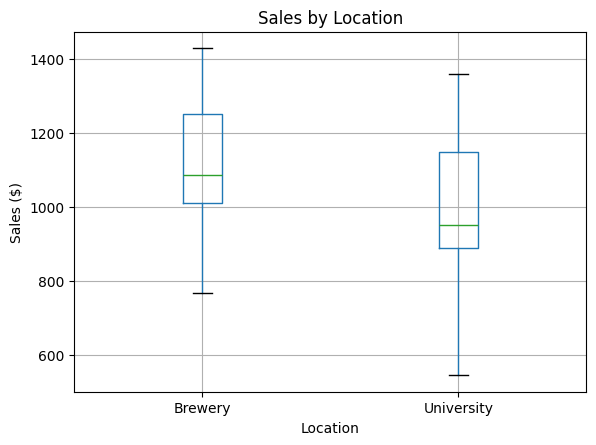

<Figure size 640x480 with 0 Axes>

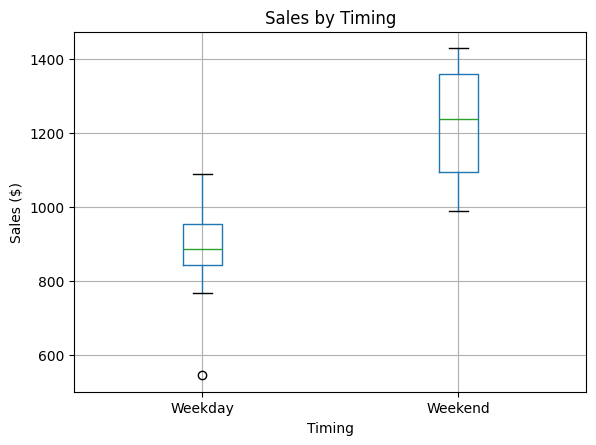

<Figure size 640x480 with 0 Axes>

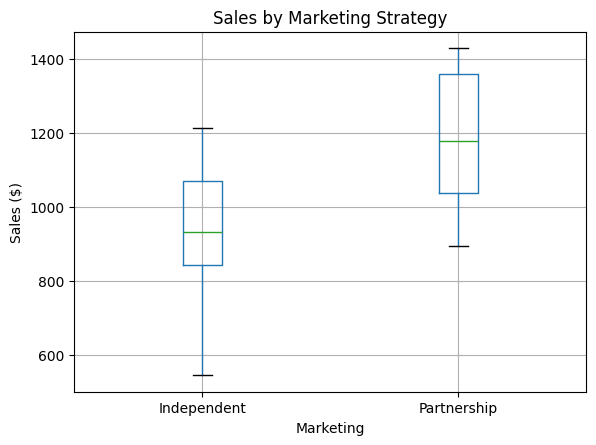

<Figure size 640x480 with 0 Axes>

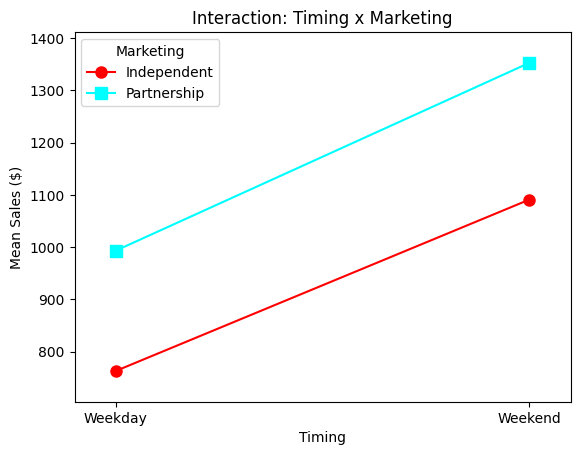

In [9]:
## Question 6 Code ##
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

# Read data
sales = pd.read_excel("Busters Burrito Sales.xlsx")

# Treat factors as categorical
for col in ["Location", "Timing", "Marketing"]:
    sales[col] = sales[col].astype("category")

print("First few rows:")
print(sales.head())

# === Descriptive statistics by full treatment combination ===
cell_summary = sales.groupby(
    ["Location", "Timing", "Marketing"]
)["Sales"].agg(["mean", "std", "count"])

print("\n=== Cell means by Location x Timing x Marketing ===")
print(cell_summary)

# === Main-effect means ===
print("\n=== Main-effect means ===")
print("\nLocation means:")
print(sales.groupby("Location")["Sales"].mean())

print("\nTiming means:")
print(sales.groupby("Timing")["Sales"].mean())

print("\nMarketing means:")
print(sales.groupby("Marketing")["Sales"].mean())

# === Boxplots by factor ===

# Location
plt.figure()
sales.boxplot(column="Sales", by="Location")
plt.title("Sales by Location")
plt.suptitle("")
plt.xlabel("Location")
plt.ylabel("Sales ($)")
plt.show()

# Timing
plt.figure()
sales.boxplot(column="Sales", by="Timing")
plt.title("Sales by Timing")
plt.suptitle("")
plt.xlabel("Timing")
plt.ylabel("Sales ($)")
plt.show()

# Marketing
plt.figure()
sales.boxplot(column="Sales", by="Marketing")
plt.title("Sales by Marketing Strategy")
plt.suptitle("")
plt.xlabel("Marketing")
plt.ylabel("Sales ($)")
plt.show()

# === Example interaction plot: Timing x Marketing ===
plt.figure()
interaction_plot(
    sales["Timing"].astype(str),
    sales["Marketing"].astype(str),
    sales["Sales"],
    markers=["o", "s"],
    ms=8
)
plt.ylabel("Mean Sales ($)")
plt.title("Interaction: Timing x Marketing")
plt.show()





In [ ]:
# Question 6 Interpretation:
# The cell means show very clear patterns:
  # Weekend + Partnership conditions produce the highest sales across both locations.
#   Brewery, Weekend, Partnership: $1,395
#   University, Weekend, Partnership: $1,310
# The lowest sales occur on Weekdays with Independent marketing, especially at the university.
  #University, Weekday, Independent: $705
#Across almost all cells, the pattern is:
#Weekend > Weekday,
#Partnership > Independent,
#Brewery > University (but by a smaller margin).

# Main effect means
# results:
# Location Means
# Brewery: $1108.68
# University: $991.61
# Brewery generally performs better, though the difference is modest.

# Timing Means
# Weekday: $878.40
# Weekend: $1221.89
# Timing has the strongest single effect; weekend sales are dramatically higher.

# Marketing Means
# Independent: $927.16
# Partnership: $1173.13
# Partnership marketing consistently boosts sales by ~$250 on average.

#Visual Interpretations:
# Boxplots:
  # Location
    # Brewery distributions are shifted higher, with higher medians and upper quartiles.
      #University has wider variability (due to some lower weekday values).
  # Timing:
    # Weekend sales clearly dominate; the distribution is entirely higher. Weekdays show lower and more variable sales.
  # Marketing
    # Partnership marketing produces noticeably higher medians and upper quartiles.Independent marketing shows a wider spread and lower center.
# Interaction Plot (Timing x Marketing)
  # Sales increase from Weekday → Weekend under both marketing strategies
  # Partnership marketing yields higher sales at both timings
  #The lines do not cross, suggesting:
    #The Marketing and Timing effects are additive
    #No visually strong interaction is present
    # Weekend + Partnership is consistently the best combination


7. Assuming a defining relation of $I=ABC$, specify the aliasing structure of the design. What does this mean for the interpretation of the main effects and interactions?

8. Fit the appropriate ANOVA model to the data. Assess the normality assumption using two methods. Do we have evidence to support the assumption of normality? Why or why not?

In [ ]:
#Question 7 Answer:
# With the defining relation 𝐼=𝐴𝐵𝐶, each main effect is aliased with a two-way interaction:
  # A =BC
  # B = AC
  # C = AB

  #This means main effects cannot be interpreted independently of the corresponding interaction terms. The design assumes that two-way interactions are negligible; otherwise, the main-effect estimates would be biased.


=== ANOVA Model Summary ===
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     33.85
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           3.89e-06
Time:                        23:32:01   Log-Likelihood:                -91.857
No. Observations:                  16   AIC:                             191.7
Df Residuals:                      12   BIC:                             194.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

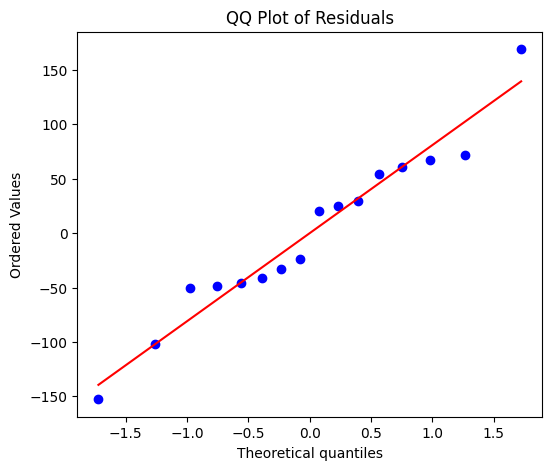

In [10]:
## Question 8 Code ##
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fit the ANOVA model with main effects only
model2 = smf.ols("Sales ~ C(Location) + C(Timing) + C(Marketing)", data=sales).fit()

print("=== ANOVA Model Summary ===")
print(model2.summary())

# === Shapiro-Wilk normality test ===
shapiro_stat, shapiro_p = shapiro(model2.resid)
print("\n=== Shapiro-Wilk Normality Test ===")
print(f"Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")

# === QQ Plot ===
plt.figure(figsize=(6,5))
stats.probplot(model2.resid, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()






In [ ]:
# Question 8 Interpretation:

#Shapiro-wilk Test: Since the p-value (0.8147) is far greater than 0.05, we fail to reject the null hypothesis of normality. There is no evidence that the residuals deviate from a normal distribution.
#Q-Q Plot:
  # Residuals fall very close to the reference line.
  # Pattern is consistent with normality


# Conclusion:We have no evidence to violate the normality assumption for this ANOVA model. The model is appropriate, and its results can be interpreted reliably.


9. Assess the constant variance assumption using two methods. Do we have evidence to support the assumption of constant variance? Why or why not?

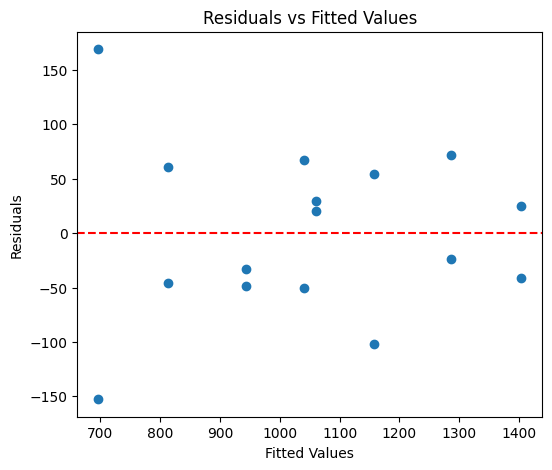

=== Levene's Test Results ===
Location: W=0.097, p=0.759
Timing:   W=0.094, p=0.763
Marketing:W=0.095, p=0.762


In [11]:
## Question 9 Code ##

import matplotlib.pyplot as plt
from scipy.stats import levene

# === Residuals vs Fitted Values Plot ===
fitted = model2.fittedvalues
residuals = model2.resid

plt.figure(figsize=(6,5))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

# === Levene’s Test ===
# Test variance across the levels of each factor separately
lev_loc = levene(
    sales.loc[sales["Location"]=="Brewery","Sales"],
    sales.loc[sales["Location"]=="University","Sales"]
)

lev_time = levene(
    sales.loc[sales["Timing"]=="Weekday","Sales"],
    sales.loc[sales["Timing"]=="Weekend","Sales"]
)

lev_mark = levene(
    sales.loc[sales["Marketing"]=="Independent","Sales"],
    sales.loc[sales["Marketing"]=="Partnership","Sales"]
)

print("=== Levene's Test Results ===")
print(f"Location: W={lev_loc.statistic:.3f}, p={lev_loc.pvalue:.3f}")
print(f"Timing:   W={lev_time.statistic:.3f}, p={lev_time.pvalue:.3f}")
print(f"Marketing:W={lev_mark.statistic:.3f}, p={lev_mark.pvalue:.3f}")


In [ ]:
# Question 9 Interpretation:

# Levene's Test:
  # All p-values > 0.05
  # Thus, for each factor: We fail to reject the null phyothesis of equal variances & there is no statistical evidence of heteroscedasticity

# Residuals vs Fitted Plot:
  # Residuals scattered fairly evenly above and below zero
  # A consistent vertical spread across the range of fitted values
  # No discernable curvature or structure

  # This pattern suggests no obvious violation of the constant variance assumption. The residuals appear to have a roughly constant spread regardless of fitted value.


 # Conclusion:
  #  We have no evidence to suggest that the variance differs across factor levels.
  # The homoscedasticity assumption appears to hold for this ANOVA model, and the results can be interpreted reliably

10. Report and interpret the ANOVA table. What conclusions can we draw about our main effects? Do the results of these analyses support the null or alternative hypotheses more strongly?

In [12]:
## Question 10 Code ##


from statsmodels.stats.anova import anova_lm

anova2 = anova_lm(model2, typ=2)
print("=== ANOVA Table (Type II) ===")
print(anova2)






=== ANOVA Table (Type II) ===
                     sum_sq    df          F    PR(>F)
C(Location)    54816.856900   1.0   7.241570  0.019633
C(Timing)     471948.390225   1.0  62.346647  0.000004
C(Marketing)  242000.044225   1.0  31.969367  0.000107
Residual       90836.972950  12.0        NaN       NaN


In [ ]:
#Question 10 Interpretation:

# There is a significant effect of Location on sales. | Sales at the brewery are significantly higher than at the university.
# Timing has the strongest effect in the entire experiment. | Weekend sales are higher than weekday sales
# Marketing is also highly significant. | Partnership marketing increases sales substantially relative to independent marketing.

# The magnitude and direction of the observed differences strongly support the conclusion that all three operational decisions impact daily sales.

11. Calculate and interpret the values for the main effects. Which effects seem more important? Why?

In [13]:
## Question 11 Code ##

# Calculate main effects manually: (mean at + level) - (mean at - level)

# Means already computed earlier:
loc_means = sales.groupby("Location")["Sales"].mean()
time_means = sales.groupby("Timing")["Sales"].mean()
mark_means = sales.groupby("Marketing")["Sales"].mean()

A_effect = loc_means["Brewery"] - loc_means["University"]
B_effect = time_means["Weekend"] - time_means["Weekday"]
C_effect = mark_means["Partnership"] - mark_means["Independent"]

print("=== Main Effects (Difference in Means) ===")
print(f"Effect of Location (A): {A_effect:.2f}")
print(f"Effect of Timing   (B): {B_effect:.2f}")
print(f"Effect of Marketing(C): {C_effect:.2f}")


=== Main Effects (Difference in Means) ===
Effect of Location (A): 117.06
Effect of Timing   (B): 343.49
Effect of Marketing(C): 245.97


/tmp/ipython-input-3091221293.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loc_means = sales.groupby("Location")["Sales"].mean()
/tmp/ipython-input-3091221293.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_means = sales.groupby("Timing")["Sales"].mean()
/tmp/ipython-input-3091221293.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mark_means = sales.groupby("Marketing")["Sales"].mean()


In [ ]:
# Question 11 Interpretation:

# Timing (B) is the most important factor: Strongly supported by both descriptive statistics and ANOVA | Produces the largest increase in sales
# Marketing (C) is the decond most important: Affects sales by about $246 & also highly significant in ANOVA
# Location (A) is the least important of the three, however, still meaningful (~$117) | Statistically significant but much smaller in magnitude.

# Thus, Weekend scheduling and Partnership marketing have the largest practical impact on sales.

12. Calculate and interpret the partial $\eta^2$ for the main effects. Which effects seem more important? Why?

In [14]:
## Question 12 Code ##

import pandas as pd

# Sum of squares from ANOVA table
ss_location = 54816.8569
ss_timing = 471948.390225
ss_marketing = 242000.044225
ss_resid = 90836.97295

# Compute partial eta squared for each factor
eta2_location = ss_location / (ss_location + ss_resid)
eta2_timing = ss_timing / (ss_timing + ss_resid)
eta2_marketing = ss_marketing / (ss_marketing + ss_resid)

print("=== Partial Eta-Squared Values ===")
print(f"Location:  {eta2_location:.3f}")
print(f"Timing:    {eta2_timing:.3f}")
print(f"Marketing: {eta2_marketing:.3f}")


=== Partial Eta-Squared Values ===
Location:  0.376
Timing:    0.839
Marketing: 0.727


In [ ]:
# Question 12 Interpretation:

# Timing explains 83.9% of the variance not accounted for by other factors. With such a large effect, it indicates that whether the truck operates on a weekday or weekend is the signle most influential factor on daily sales.
# Marketing explains 72.7% of variance and shows that using partnership marketing produces substantial increases in sales relative to independent marketing
# Location explains 37.6% of variance and sales tend to be higher at the brewery than at the university

# Weekend scheduling and partnership marketing are by far the most powerful levers for increasing daily sales in this experiment

13. Give an overall conclusion for the experiment. Which location, timing, and marketing combination(s) should you use to maximize sales? What are the limitations of your experiment? How could you improve it in the future?

## Part 3 Instructions:

Please briefly repond to the following questions:

1. How do we de-alias the main effects and interactions in a fractional factorial design? Why is this important? Why may it not always be feasible?

2. In all of our assignments, I have had you specify/consider a lot of characteristics of an experiment before getting into the analysis. Why is this good practice?

3.  What is the most important thing you learned in this class?

In [ ]:
# Part 2 Question 13 Answer:

# When you operate, how you market, and where you park the truck all matter - but when and how you market matters the most.
# The best combinations to maximize sales:
  # Operate on weekends, use partnership marketing, and (if possible) choose the brewery location.
  # If you cannot always be at the brewery, Weekend + Partnership is the core money combo. Location matters, but is secondary to timing and marketing

# Limitations:
  # Single outcome of daily sales: Other relevant outcomes (profit margin, labor constraints, repeat business) were not measured.
  # Small sample size: Only 2 observations per treatment combination. This makes it harder to detect subtle patterns or check assumptions powerfully.
  # External conditions: Results may depend on specific days (weather, special events, game days, etc)
  # Fractional factorial aliasing: We cannot fully separate main effects from certain interactions; results rely on the assumption that interactions are small.

#Improvements:
  # Move to a full factorial or higher-resolution design to remove some of the aliasing ambiguity.
  # To help check constant variance and normality, increase replication.
  # Block or record important covariates so you can adjust effects.
  # Include additional performance metrics such as average order size, repeat visits, or profit to capture business impact & not just revenue.


In [ ]:
# Part 3 Question 1 Answer:

#  We de-alias fractional factorial designs by adding a complementary fraction (fold-over) or by increasing the design resolution. This separates previously confounded effects so we can correctly interpret main effects and interactions.
#  It is important because aliasing can cause incorrect conclusions about which factors truly matter.
#  However, de-aliasing may not always be feasible due to cost, time constraints, operational limitations, or the nature of the factors being studied.

In [ ]:
# Part 3 Question 2 Answer:

# Carefully specifying experimental characteristics before analysis is good practice because it ensures that the experiment answers the intended questions, avoids confounding and bias, uses resources efficiently, and supports a valid, interpretable, and defensible statistical analysis. Good design leads to good inference.



In [ ]:
# Part 3 Question 3 Answer:

# Part 1 Answer: This class taught me the importance of Dr. Brown's hard work in engaging students to use industry standard platforms as well as his patience with the assignments over the course of this semester.

# Part 2 Answer: The biggest takeaway is that data analysis cannot fix a poorly designed experiment, but a well-designed experiment makes the analysis clean, interpretable, and powerful. Understanding concepts like blocking, fractional factorial aliasing, interaction structures, and effect estimation completely changed how I think about evidence and causality.